# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
coordinate_pairs = []

# Empty list for holding the cities names
unique_cities = []

# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

# Create a set of random lat and lng combinations
random_latitudes = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
random_longitudes = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
coordinate_pairs = zip(random_latitudes, random_longitudes)

# Identify nearest city for each lat, lng combination
for coords in coordinate_pairs:
    nearest_city = citipy.nearest_city(coords[0], coords[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if nearest_city not in unique_cities:
        unique_cities.append(nearest_city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(unique_cities)}")


Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(unique_cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | sabang
Processing Record 3 of Set 1 | bandon
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | broken hill
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | katsuren-haebaru
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | walvis bay
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | ayod
City not found. Skipping...
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | toyooka
Processing Record 19 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 20 of Set 1 | altamira
Processing Record 21 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,266.16,73,75,0.00,GL,1701670075
1,sabang,5.8933,95.3214,300.69,75,99,2.07,ID,1701670075
2,bandon,51.7469,-8.7425,273.92,89,51,8.86,IE,1701670076
3,port-aux-francais,-49.3500,70.2167,277.13,71,15,14.75,TF,1701670076
4,kodiak,57.7900,-152.4072,275.88,81,100,4.12,US,1701670076


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,266.16,73,75,0.00,GL,1701670075
1,sabang,5.8933,95.3214,300.69,75,99,2.07,ID,1701670075
2,bandon,51.7469,-8.7425,273.92,89,51,8.86,IE,1701670076
3,port-aux-francais,-49.3500,70.2167,277.13,71,15,14.75,TF,1701670076
4,kodiak,57.7900,-152.4072,275.88,81,100,4.12,US,1701670076


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

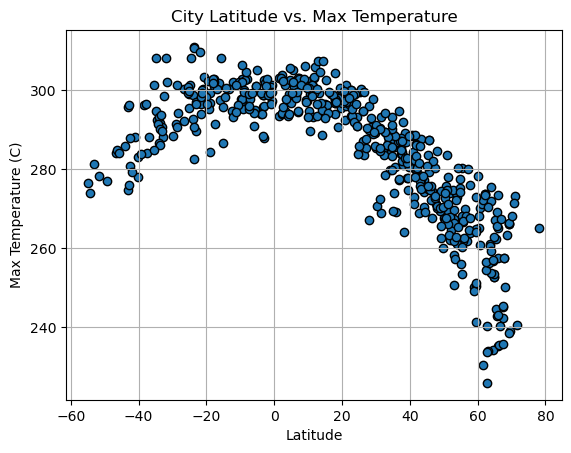

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

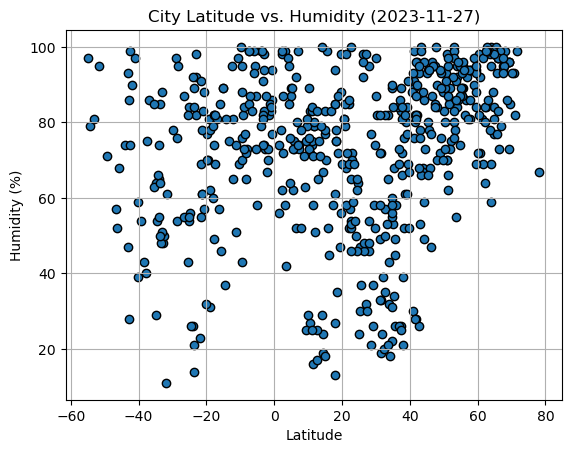

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

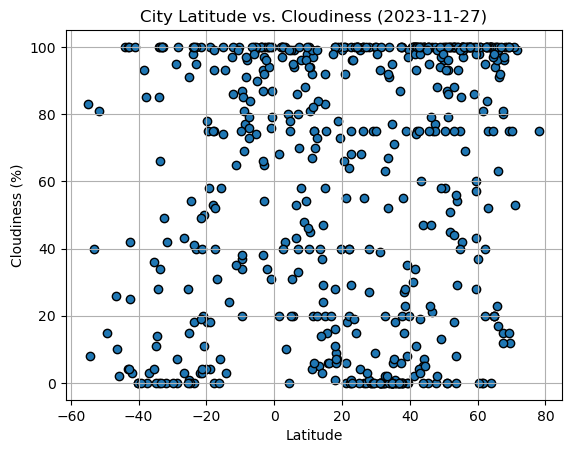

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

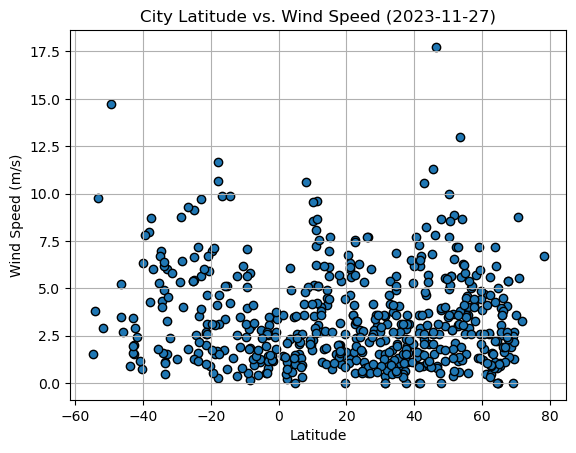

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression_plt(x_values, y_values, x_label, y_label, formula_position):
    
    (slope, y_intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regression_points = x_values * slope + y_intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_points, "r-", label=f'y={round(slope,2)}x + {round(y_intercept,2)}')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    line_formula = f'y={round(slope, 2)}x + {round(y_intercept,2)}'
    plt.annotate(line_formula, xy=formula_position, xycoords='axes fraction', fontsize = 15)
    
    print(f'The r-value is: {r_value}')
    plt.show()

city_data_df.loc[city_data_df['Lat']>= 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,266.16,73,75,0.00,GL,1701670075
1,sabang,5.8933,95.3214,300.69,75,99,2.07,ID,1701670075
2,bandon,51.7469,-8.7425,273.92,89,51,8.86,IE,1701670076
4,kodiak,57.7900,-152.4072,275.88,81,100,4.12,US,1701670076
5,kavaratti,10.5669,72.6420,302.38,72,81,5.16,IN,1701670076
...,...,...,...,...,...,...,...,...,...
559,luorong,24.4058,109.6086,290.91,65,100,1.75,CN,1701670220
561,les cayes,18.2000,-73.7500,296.99,75,7,1.69,HT,1701670221
562,dapa,9.7594,126.0531,300.58,81,100,4.19,PH,1701670221


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,266.16,73,75,0.00,GL,1701670075
1,sabang,5.8933,95.3214,300.69,75,99,2.07,ID,1701670075
2,bandon,51.7469,-8.7425,273.92,89,51,8.86,IE,1701670076
4,kodiak,57.7900,-152.4072,275.88,81,100,4.12,US,1701670076
5,kavaratti,10.5669,72.6420,302.38,72,81,5.16,IN,1701670076


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,277.13,71,15,14.75,TF,1701670076
6,broken hill,-31.9500,141.4333,308.10,11,0,2.39,AU,1701670076
7,bredasdorp,-34.5322,20.0403,292.39,54,14,4.35,ZA,1701670076
8,waitangi,-43.9535,-176.5597,285.83,74,100,0.89,NZ,1701670077
12,walvis bay,-22.9575,14.5053,289.68,82,40,5.66,NaN,1701669811


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8784541753791668


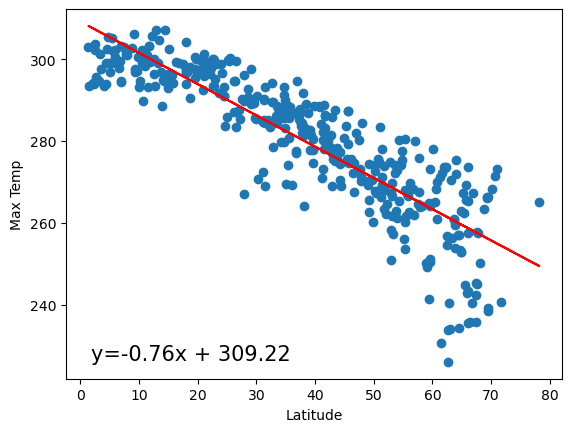

In [17]:
# Linear regression on Northern Hemisphere
linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (0.05, 0.05))

The r-value is: 0.5999080769868373


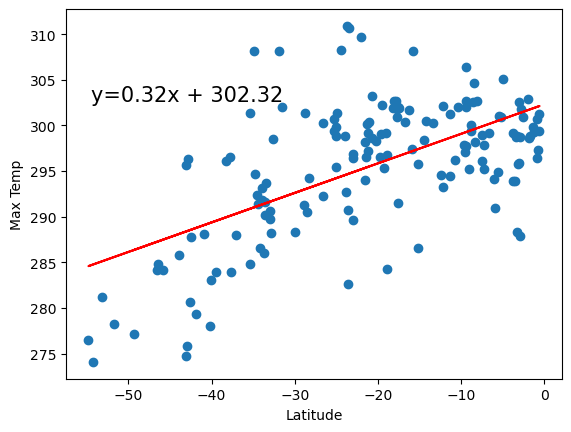

In [18]:
# Linear regression on Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp', (0.05, 0.75))

**Discussion about the linear relationship:** 
Based on the regression analysis, it is evident that in the Northern Hemisphere, there's a marked negative correlation between temperature and latitude, indicating that temperatures drop as one moves farther from the equator. Conversely, in the Southern Hemisphere, there is a relatively strong positive correlation between maximum temperature and latitude, suggesting that maximum temperatures rise as one approaches the equator. In summary, the temperature trends in both hemispheres are inversely mirrored; in both cases, maximum temperatures decrease as distances from the equator increase.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.38528606579785213


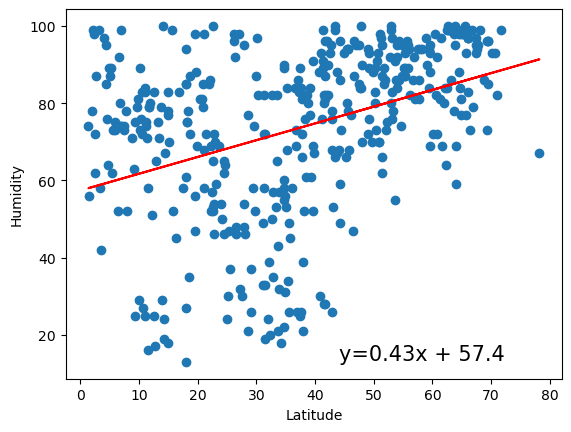

In [19]:
# Northern Hemisphere
linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (0.55, 0.05))

The r-value is: 0.26871041815976576


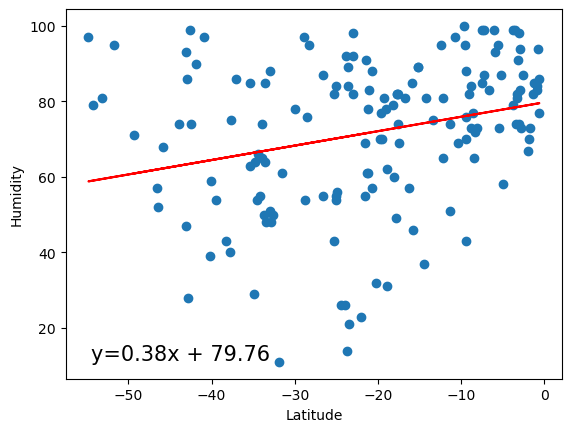

In [20]:
# Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (0.05, 0.05))

**Discussion about the linear relationship:** The regression analysis indicates a significant negative correlation between temperature and latitude in the Northern Hemisphere, implying that temperatures decrease as one moves further from the equator. Conversely, in the Southern Hemisphere, there is a moderately strong positive correlation, suggesting that maximum temperatures rise as one approaches the equator. Essentially, the temperature patterns in both hemispheres mirror each other inversely, with maximum temperatures dropping as locations move away from the equatorial region.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17497780944697133


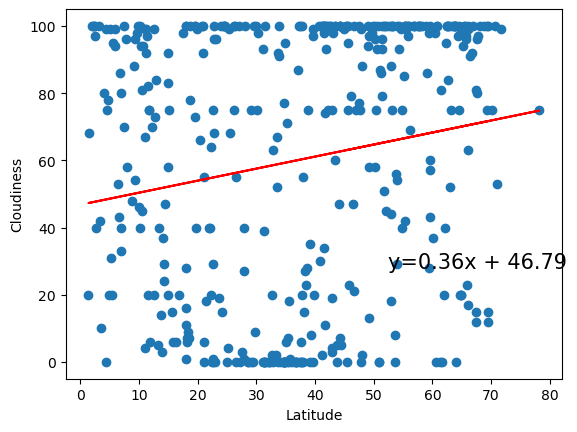

In [21]:
# Northern Hemisphere
linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (0.65, 0.30))

The r-value is: 0.40273485785522434


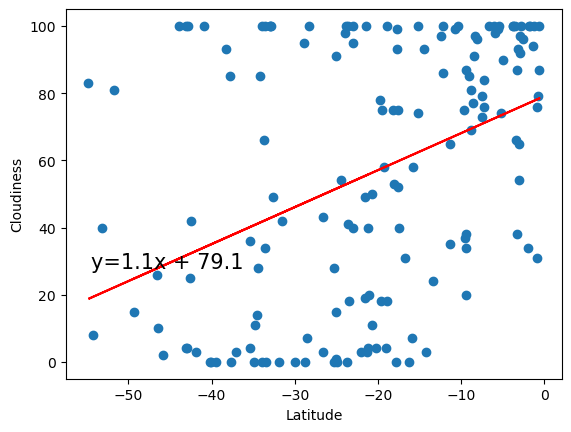

In [22]:
# Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (0.05, 0.30))

**Discussion about the linear relationship:** cloudiness and latitude have a weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02365114205090867


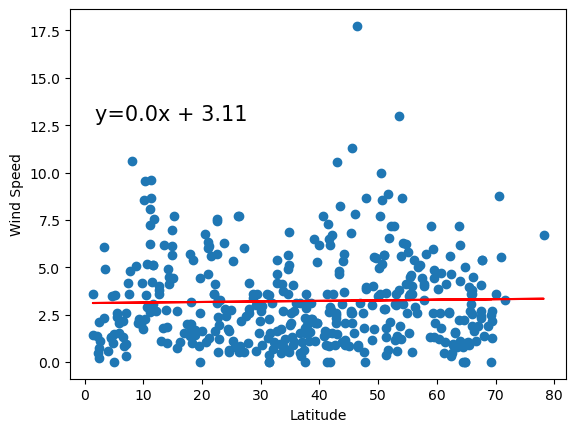

In [23]:
# Northern Hemisphere
linear_regression_plt(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (0.05, 0.70))

The r-value is: -0.26709206485544307


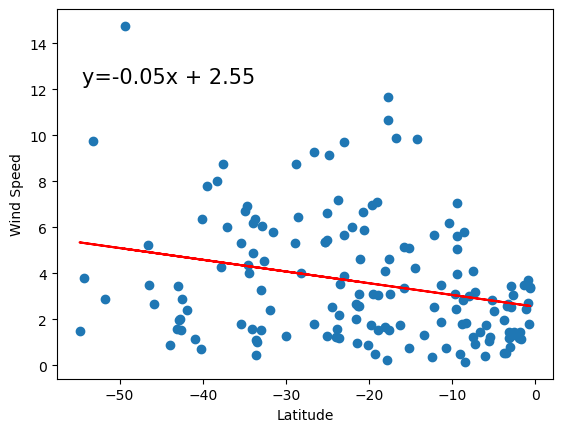

In [24]:
# Southern Hemisphere
linear_regression_plt(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (0.05, 0.80))

**Discussion about the linear relationship:** 
Analyzing the results with the r-value, it can be concluded that there is a weak correlation between wind speed and latitude.